# **Experiment using RNN and LSTM to predict the Sentiment of tweets**




In [1]:
from google.colab import drive
drive.mount('/content/drive')


import os
os.chdir('/content/drive/My Drive/Disseration')
folder = os.path.join('/content/drive/My Drive/Disseration')
!ls

Mounted at /content/drive
 best_model2.hdf5	    restriction_tweets		 test.csv
 covid19_tweets		    rnn_model_4.hdf5		 train.csv
'Dashboard Design'	    rnn_model.hdf5		 twitter_dash.zip
 df_test.csv		    SentimentExpiriment.ipynb	 vaccination_tweets
 editing_sentiments.ipynb   Sentiment_prediction.ipynb


# **Importing Of Libraries**




## **Large installation**




In [2]:
 !python3 -c "import nltk; nltk.download('all')"

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [3]:
pip install emojis

In [4]:
pip install dash

     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 1.0MB 22.8MB/s 
     |████████████████████████████████| 3.5MB 46.4MB/s 
     |████████████████████████████████| 92kB 12.2MB/s 
     |████████████████████████████████| 1.8MB 51.1MB/s 
     |████████████████████████████████| 358kB 51.9MB/s 
  Created wheel for dash: filename=dash-1.20.0-cp37-none-any.whl size=85834 sha256=08fee57d7d2528442595e1ae569db013dc00871355a5b840e8b88bda9877b71b
  Stored in directory: /root/.cache/pip/wheels/e6/33/41/ce361d0d1da277d2350f815b10f2ab1e331592d93ef2b07e29
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-cp37-none-any.whl size=1014875 sha256=39b6c4e73e6fb0dd0f8aa4f7295ff21c8cabe34034aa1a154ba245660e3ef6c8
  Stored in directory: /root/.cache/pip/wheels/03/a9/c5/dd5815c601b0ede164c223ffd7bafebde716ca57de06ef8aec
  Created wheel for dash-core-components: filename=dash_core_components-1.16.0-cp37-none-any.whl size=3540993 sha256=2efcdccf4b8affd447558

In [5]:
pip install dash

In [6]:
pip install jupyter_dash

## **Importing**

In [7]:
# Basic Libraries
import pandas as pd
import numpy as np
import string
import emojis

# Scikit Libraries

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


# NLTK Libraries

import nltk 
from nltk.tokenize import TweetTokenizer 
from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Tenserflow Libraries

import tensorflow as tf
from keras.utils.np_utils import to_categorical
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM,SpatialDropout1D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Keras Libraries

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout,Masking
from sklearn.feature_extraction.text import CountVectorizer
from keras.utils.np_utils import to_categorical
import re
import keras
keras.__version__
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout


# Visualisation imports

import plotly.express as px
import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import io
from base64 import b64encode
import missingno as ms
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# **1. Loading the Data**
- The dataset used for Training the RNN model is taken from kaagle.com
  - https://www.kaggle.com/kazanova/sentiment140
  
- Also as i am limited with resources i have downsampled the size of Dataset after importing  



In [8]:
df = pd.read_csv("train.csv", encoding= "ISO-8859-1", engine="python")
df.columns = ["sentiment","id","date","query","user_id","text"]

In [9]:
df = df.sample(50000)

In [10]:
# resetting the index values
df.reset_index(drop=True, inplace=True)

In [11]:
df.isnull().values.any()

False

In [12]:
df.isnull().sum().sum()

0

In [13]:
df.shape

(50000, 6)

In [14]:
df.head(3)

,sentiment,id,date,query,user_id,text
0,4,2054246920,Sat Jun 06 06:55:20 PDT 2009,NO_QUERY,txshurricane,@bapenguin - Thank you
1,0,2202822621,Tue Jun 16 22:28:56 PDT 2009,NO_QUERY,keef_,So twitter went down last night and I missed it
2,0,1968160020,Fri May 29 20:52:34 PDT 2009,NO_QUERY,kate_fox,Apparently my 2 bottom wisdom teeth weren't sa...


In [15]:
distrubution_df = df.copy()
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
distrubution_df.sentiment = distrubution_df.sentiment.apply(lambda x: label_decoder(x))
fig = px.histogram(distrubution_df, x="sentiment",color="sentiment", width=600, height=400,title="Bar Chart to Explain Sentiment Distrubution")

fig.show()

#**2. Pre-Processing The Data**

In [16]:
# Replacing all 4 with 1 in sentiment Column.
df['sentiment'] = df['sentiment'].replace([4],1)

In [17]:
df['text'] = df['text'].astype('str')

In [18]:
# # Dropping Unwanted columns
# df.drop(['date','query','user_id','id'], axis=1, inplace=True)

**Cleaning the Tweets in each row using a cleaning_tweet function**


*   Removing URL,@ and punctuation.
*   tokeninzing words and removing stop words.



In [19]:
stopword = set(stopwords.words('english'))
wordLemm_nltk = WordNetLemmatizer()
URL_from_tweet = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
user_name = '@[^\s]+'


In [20]:

def cleaning_the_tweets(tweet):
    tweet = tweet.lower()
    tweet = tweet[1:]
    tweet = re.sub(URL_from_tweet,'',tweet)
    tweet = re.sub(user_name,'', tweet) 
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    tokens = word_tokenize(tweet)
    tokenized = [w for w in tokens if w not in stopword]
    final_tweet_words=[]
    for w in tokenized:
      if len(w)>1:
        wordlemmatize = wordLemm_nltk.lemmatize(w)
        final_tweet_words.append(wordlemmatize)
    return ' '.join(final_tweet_words)

In [21]:
df['cleaned_tweet'] = df['text'].apply(lambda text: cleaning_the_tweets(text))
df.head(2)

,sentiment,id,date,query,user_id,text,cleaned_tweet
0,1,2054246920,Sat Jun 06 06:55:20 PDT 2009,NO_QUERY,txshurricane,@bapenguin - Thank you,bapenguin thank
1,0,2202822621,Tue Jun 16 22:28:56 PDT 2009,NO_QUERY,keef_,So twitter went down last night and I missed it,twitter went last night missed


# **3. Visualising the Tweets**

## **3.1 WordCloud According to Sentiment**

**Negative World Cloud**

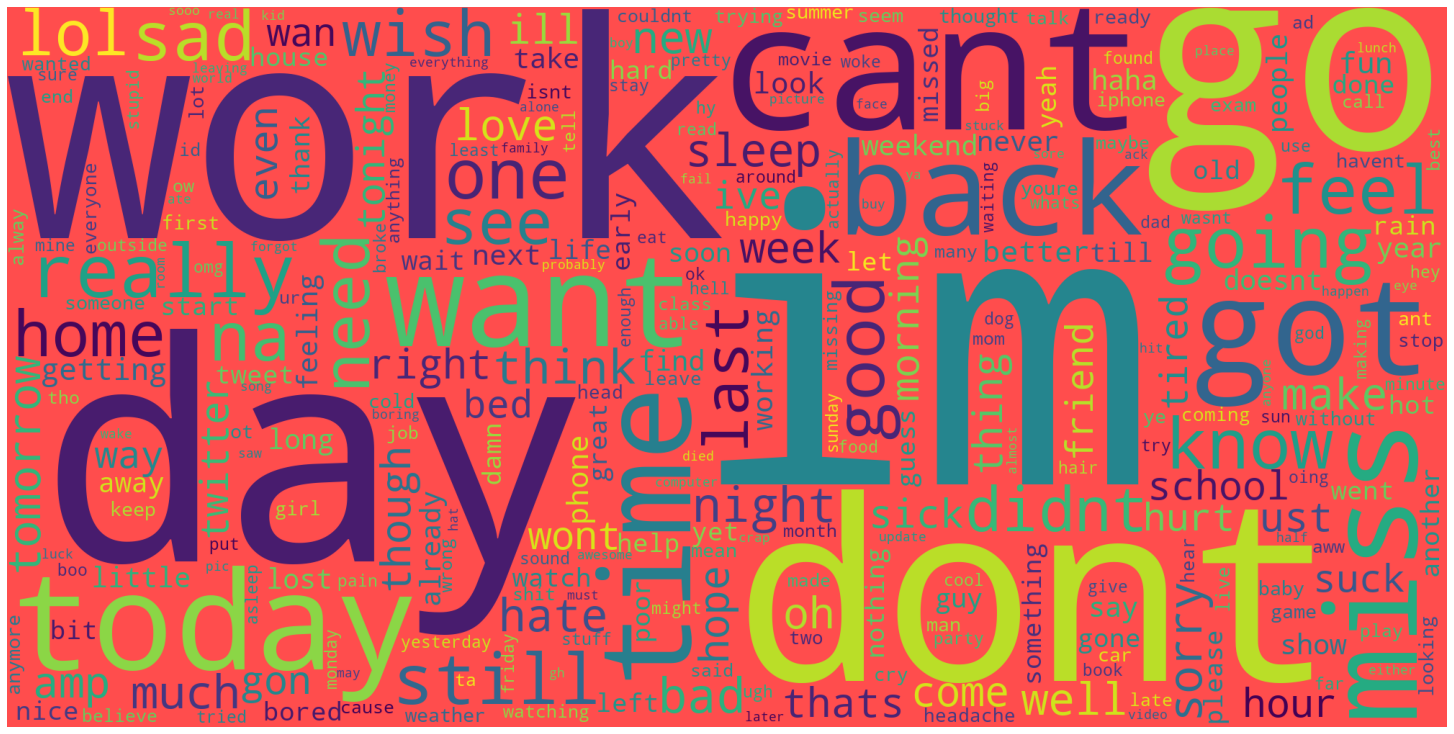

In [ ]:
wordcloud = WordCloud(background_color="#ff4d4d", max_words=300, width=2000, height=1000, collocations=False).generate(" ".join(df[df.sentiment == 0].cleaned_tweet))

plt.figure(figsize = (20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

**Positive World Cloud**

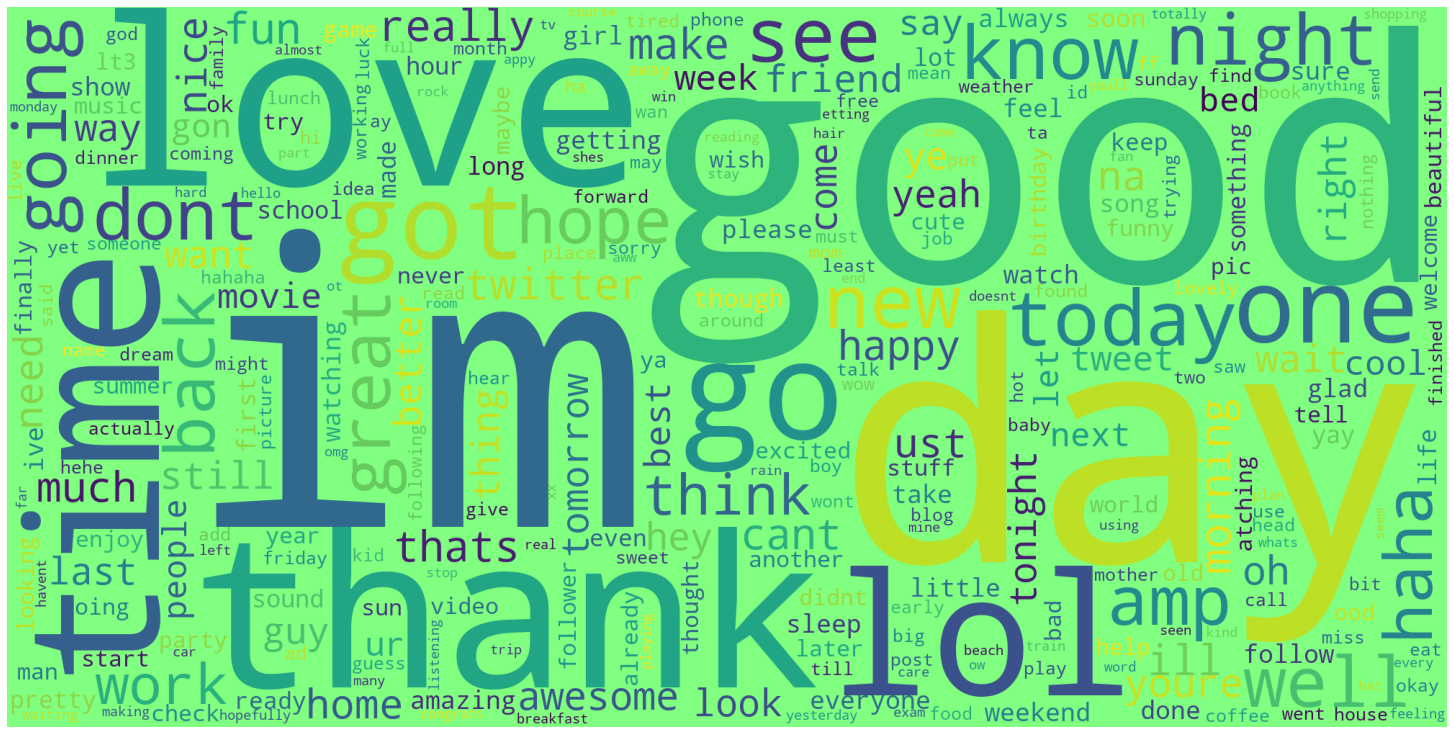

In [ ]:
wordcloud = WordCloud(background_color="#80ff80", max_words=300, width=2000, height=1000, collocations=False).generate(" ".join(df[df.sentiment == 1].cleaned_tweet))

plt.figure(figsize = (20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

## **3.2 Plotting a Barchart with users sentiments**

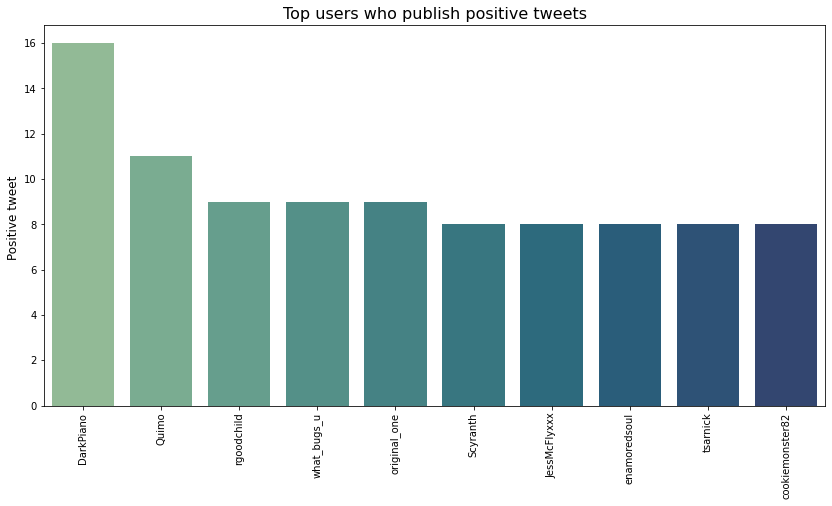

In [23]:
plt.figure(figsize=(14,7))
common_keyword=sns.barplot(x=df[df['sentiment']==1]['user_id'].value_counts()[:10].index, \
                           y=df[df['sentiment']==1]['user_id'].value_counts()[:10],palette='crest')
common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
common_keyword.set_ylabel('Positive tweet ',fontsize=12)
plt.title('Top users who publish positive tweets',fontsize=16)
plt.show()

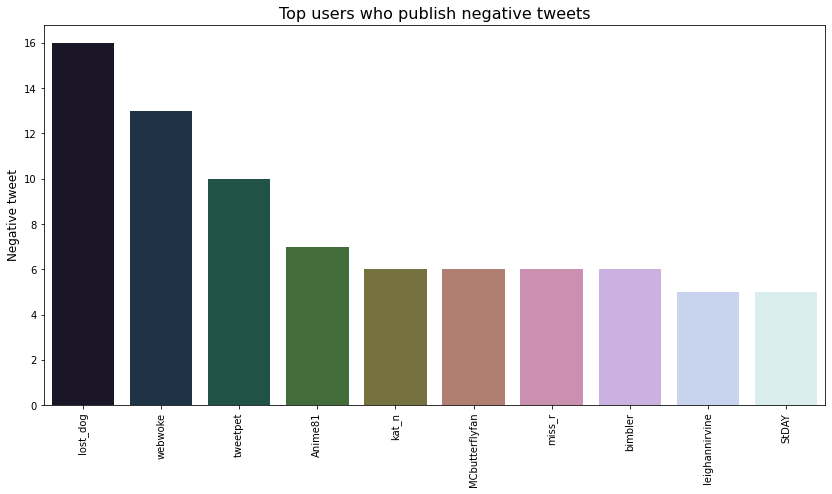

In [24]:
plt.figure(figsize=(14,7))
common_keyword=sns.barplot(x=df[df['sentiment']==0]['user_id'].value_counts()[:10].index, \
                           y=df[df['sentiment']==0]['user_id'].value_counts()[:10],palette='cubehelix')
common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
common_keyword.set_ylabel('Negative tweet',fontsize=12)
plt.title('Top users who publish negative tweets',fontsize=16)
plt.show()

# **4. Train And Test Split**

In [25]:
maximum_words = 1000
maximum_length = 100

tokenizer = Tokenizer(num_words=maximum_words)
tokenizer.fit_on_texts(df.cleaned_tweet)
tokenized_sequences = tokenizer.texts_to_sequences(df.cleaned_tweet)
paded_tweets = pad_sequences(tokenized_sequences, maxlen=maximum_length)
paded_tweets

array([[  0,   0,   0, ...,   0,   0,  95],
       [  0,   0,   0, ...,  39,  22, 163],
       [  0,   0,   0, ...,   6,  18, 795],
       ...,
       [  0,   0,   0, ...,  22,  23,   2],
       [  0,   0,   0, ..., 566, 231,  54],
       [  0,   0,   0, ..., 362,   7, 320]], dtype=int32)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(paded_tweets, df.sentiment.values, test_size=0.2, random_state=42)

# **5. RNN & LSTM Model Expiriments**

## **5.1 Experiment 1**

### **Activation Functions**

- In a neural network, the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input.

#### **1. Relu**

In [ ]:
# The valaccuracy = 73.02% good continous learning
model = Sequential()
model.add(layers.Embedding(maximum_words, 20))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(15,dropout=0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 20)          20000     
_________________________________________________________________
lstm_20 (LSTM)               (None, None, 128)         76288     
_________________________________________________________________
lstm_21 (LSTM)               (None, 15)                8640      
_________________________________________________________________
dense_21 (Dense)             (None, 32)                512       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33        
Total params: 105,473
Trainable params: 105,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=5,save_best_only=True, mode='auto', period=1,save_weights_only=False)
model_history = model.fit(X_train, y_train, epochs=6,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/6
1250/1250 [==============================] - 131s 103ms/step - loss: 0.6024 - accuracy: 0.6525 - val_loss: 0.5275 - val_accuracy: 0.7306

Epoch 00001: val_accuracy improved from -inf to 0.73060, saving model to rnn_model.hdf5
Epoch 2/6
1250/1250 [==============================] - 128s 102ms/step - loss: 0.5190 - accuracy: 0.7404 - val_loss: 0.5224 - val_accuracy: 0.7358

Epoch 00002: val_accuracy improved from 0.73060 to 0.73580, saving model to rnn_model.hdf5
Epoch 3/6
1250/1250 [==============================] - 131s 105ms/step - loss: 0.5119 - accuracy: 0.7452 - val_loss: 0.5199 - val_accuracy: 0.7308

Epoch 00003: val_accuracy did not improve from 0.73580
Epoch 4/6
1250/1250 [==============================] - 128s 102ms/step - loss: 0.5031 - accuracy: 0.7486 - val_loss: 0.5184 - val_accuracy: 0.7353

Epoch 00004: val_accuracy did not improve from 0.73580
Epoch 5/6
1250/1250 [==============================] - 128s 103ms/step - loss: 0.4970 - accuracy: 0.7510 - val_loss: 0.

In [ ]:
#Defnining a handy function in order to plot various models accuracy and loss progress

def plot_acc_loss(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


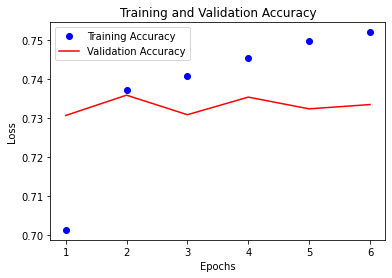

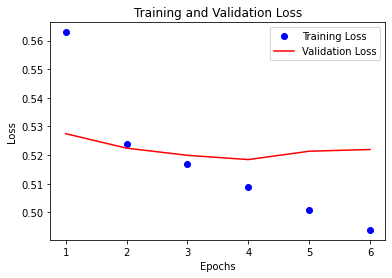

In [ ]:
plot_acc_loss(model_history)

#### **2. Sigmoid**

In [ ]:
model = Sequential()
model.add(layers.Embedding(maximum_words, 20))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(15,dropout=0.5))
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 20)          20000     
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 128)         76288     
_________________________________________________________________
lstm_5 (LSTM)                (None, 15)                8640      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 105,473
Trainable params: 105,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
model_history = model.fit(X_train, y_train, epochs=6,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/6
1250/1250 [==============================] - 19s 13ms/step - loss: 0.6670 - accuracy: 0.5622 - val_loss: 0.5329 - val_accuracy: 0.7322

Epoch 00001: val_accuracy improved from -inf to 0.73220, saving model to rnn_model.hdf5
Epoch 2/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5358 - accuracy: 0.7280 - val_loss: 0.5289 - val_accuracy: 0.7294

Epoch 00002: val_accuracy did not improve from 0.73220
Epoch 3/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5227 - accuracy: 0.7413 - val_loss: 0.5271 - val_accuracy: 0.7315

Epoch 00003: val_accuracy did not improve from 0.73220
Epoch 4/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5186 - accuracy: 0.7422 - val_loss: 0.5203 - val_accuracy: 0.7409

Epoch 00004: val_accuracy improved from 0.73220 to 0.74090, saving model to rnn_model.hdf5
Epoch 5/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5199 - accuracy: 0.7392 - val_loss: 0.5224 - val

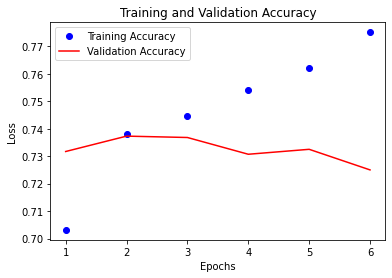

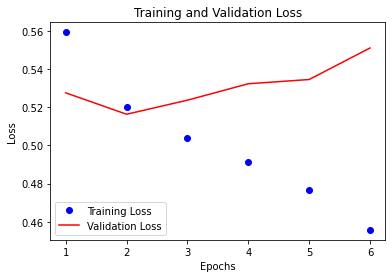

In [ ]:
plot_acc_loss(model_history)

#### **3. tanh**

In [ ]:
model = Sequential()
model.add(layers.Embedding(maximum_words, 256))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(64))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 256)         256000    
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 128)         197120    
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 504,641
Trainable params: 504,641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
model_history = model.fit(X_train, y_train, epochs=6,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/6
1250/1250 [==============================] - 25s 18ms/step - loss: 0.5915 - accuracy: 0.6688 - val_loss: 0.5275 - val_accuracy: 0.7317

Epoch 00001: val_accuracy improved from -inf to 0.73170, saving model to rnn_model.hdf5
Epoch 2/6
1250/1250 [==============================] - 21s 17ms/step - loss: 0.5202 - accuracy: 0.7376 - val_loss: 0.5163 - val_accuracy: 0.7373

Epoch 00002: val_accuracy improved from 0.73170 to 0.73730, saving model to rnn_model.hdf5
Epoch 3/6
1250/1250 [==============================] - 21s 17ms/step - loss: 0.4963 - accuracy: 0.7522 - val_loss: 0.5237 - val_accuracy: 0.7368

Epoch 00003: val_accuracy did not improve from 0.73730
Epoch 4/6
1250/1250 [==============================] - 21s 17ms/step - loss: 0.4833 - accuracy: 0.7587 - val_loss: 0.5323 - val_accuracy: 0.7307

Epoch 00004: val_accuracy did not improve from 0.73730
Epoch 5/6
1250/1250 [==============================] - 21s 17ms/step - loss: 0.4650 - accuracy: 0.7697 - val_loss: 0.5345 - val

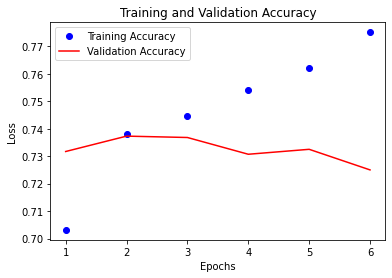

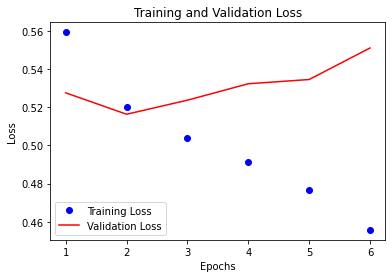

In [ ]:
plot_acc_loss(model_history)

### **Conclusion**

I have choosen the Relu function as it gave an optimistic testing score. Also compared to other activation function Relu is maintaing a stability in overfitting. 

## 5.2 Experiment 2

### **No of Layers**

#### **1. No of Layer = 1**

In [ ]:
model = Sequential()
model.add(layers.Embedding(maximum_words, 20))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 20)          20000     
_________________________________________________________________
lstm_8 (LSTM)                (None, None, 128)         76288     
_________________________________________________________________
dense_8 (Dense)              (None, None, 32)          4128      
_________________________________________________________________
dense_9 (Dense)              (None, None, 1)           33        
Total params: 100,449
Trainable params: 100,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
model_history = model.fit(X_train, y_train, epochs=6,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/6
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6924 - accuracy: 0.5089 - val_loss: 0.6887 - val_accuracy: 0.5059

Epoch 00001: val_accuracy improved from -inf to 0.50591, saving model to rnn_model.hdf5
Epoch 2/6
1250/1250 [==============================] - 11s 9ms/step - loss: 0.6895 - accuracy: 0.5101 - val_loss: 0.6884 - val_accuracy: 0.5058

Epoch 00002: val_accuracy did not improve from 0.50591
Epoch 3/6
1250/1250 [==============================] - 12s 9ms/step - loss: 0.6879 - accuracy: 0.5135 - val_loss: 0.6884 - val_accuracy: 0.5059

Epoch 00003: val_accuracy did not improve from 0.50591
Epoch 4/6
1250/1250 [==============================] - 12s 9ms/step - loss: 0.6877 - accuracy: 0.5142 - val_loss: 0.6886 - val_accuracy: 0.5059

Epoch 00004: val_accuracy did not improve from 0.50591
Epoch 5/6
1250/1250 [==============================] - 11s 9ms/step - loss: 0.6873 - accuracy: 0.5101 - val_loss: 0.6888 - val_accuracy: 0.5059

Epoch 00005: val_accu

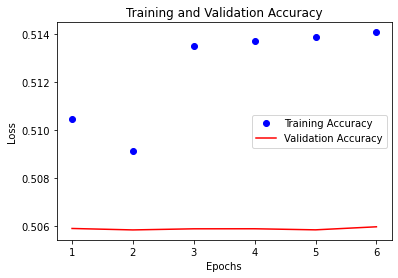

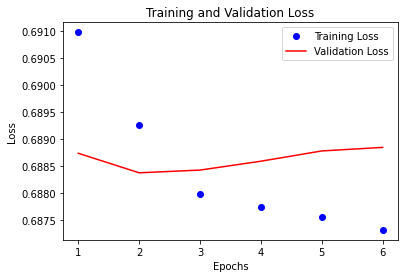

In [ ]:
plot_acc_loss(model_history)

#### **2. No of Layer = 2**

In [ ]:
model = Sequential()
model.add(layers.Embedding(maximum_words, 20))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(128))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 20)          20000     
_________________________________________________________________
lstm_9 (LSTM)                (None, None, 128)         76288     
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_10 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 232,033
Trainable params: 232,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
model_history = model.fit(X_train, y_train, epochs=6,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/6
1250/1250 [==============================] - 22s 16ms/step - loss: 0.6076 - accuracy: 0.6506 - val_loss: 0.5289 - val_accuracy: 0.7330

Epoch 00001: val_accuracy improved from -inf to 0.73300, saving model to rnn_model.hdf5
Epoch 2/6
1250/1250 [==============================] - 19s 15ms/step - loss: 0.5251 - accuracy: 0.7391 - val_loss: 0.5310 - val_accuracy: 0.7351

Epoch 00002: val_accuracy improved from 0.73300 to 0.73510, saving model to rnn_model.hdf5
Epoch 3/6
1250/1250 [==============================] - 19s 15ms/step - loss: 0.5175 - accuracy: 0.7415 - val_loss: 0.5236 - val_accuracy: 0.7342

Epoch 00003: val_accuracy did not improve from 0.73510
Epoch 4/6
1250/1250 [==============================] - 19s 15ms/step - loss: 0.5039 - accuracy: 0.7507 - val_loss: 0.5211 - val_accuracy: 0.7362

Epoch 00004: val_accuracy improved from 0.73510 to 0.73620, saving model to rnn_model.hdf5
Epoch 5/6
1250/1250 [==============================] - 19s 15ms/step - loss: 0.4907 - accur

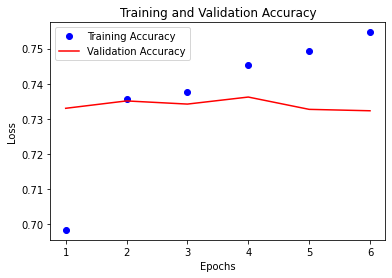

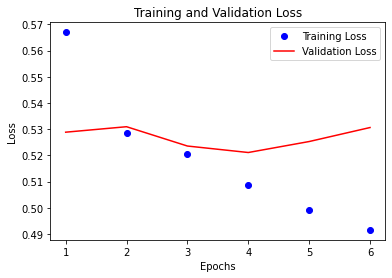

In [ ]:
plot_acc_loss(model_history)

### **Conclusion**

I have choosen 2 LSTM layer because it perfomes beeter and it has an val accuracy of 73.62

## 5.3 Experiment 3

### **Dropout Rate**

#### **1. drop_rate = 0.2**

In [ ]:
model = Sequential()
model.add(layers.Embedding(maximum_words, 20))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(15,dropout=0.5))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 20)          20000     
_________________________________________________________________
lstm_19 (LSTM)               (None, None, 128)         76288     
_________________________________________________________________
lstm_20 (LSTM)               (None, 15)                8640      
_________________________________________________________________
dropout_3 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                512       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 105,473
Trainable params: 105,473
Non-trainable params: 0
_______________________________________________

In [ ]:
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
model_history = model.fit(X_train, y_train, epochs=6,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/6
1250/1250 [==============================] - 19s 14ms/step - loss: 0.6190 - accuracy: 0.6295 - val_loss: 0.5331 - val_accuracy: 0.7283

Epoch 00001: val_accuracy improved from -inf to 0.72830, saving model to rnn_model.hdf5
Epoch 2/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5327 - accuracy: 0.7323 - val_loss: 0.5334 - val_accuracy: 0.7351

Epoch 00002: val_accuracy improved from 0.72830 to 0.73510, saving model to rnn_model.hdf5
Epoch 3/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5212 - accuracy: 0.7388 - val_loss: 0.5212 - val_accuracy: 0.7361

Epoch 00003: val_accuracy improved from 0.73510 to 0.73610, saving model to rnn_model.hdf5
Epoch 4/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5120 - accuracy: 0.7453 - val_loss: 0.5248 - val_accuracy: 0.7364

Epoch 00004: val_accuracy improved from 0.73610 to 0.73640, saving model to rnn_model.hdf5
Epoch 5/6
1250/1250 [==============================] - 

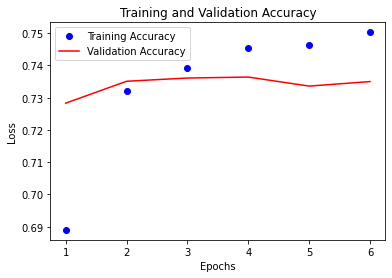

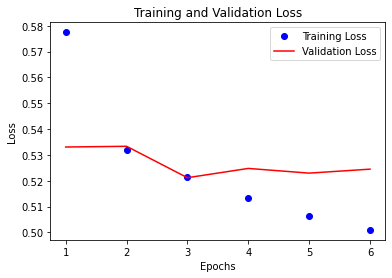

In [ ]:
plot_acc_loss(model_history)

#### **1. drop_rate= 0.3**

In [27]:
model = Sequential()
model.add(layers.Embedding(maximum_words, 20))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(15,dropout=0.5))
model.add(layers.Dropout(rate = 0.3))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 20)          20000     
_________________________________________________________________
lstm (LSTM)                  (None, None, 128)         76288     
_________________________________________________________________
lstm_1 (LSTM)                (None, 15)                8640      
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 105,473
Trainable params: 105,473
Non-trainable params: 0
__________________________________________________

In [28]:
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
model_history = model.fit(X_train, y_train, epochs=6,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/6
1250/1250 [==============================] - 50s 13ms/step - loss: 0.6198 - accuracy: 0.6311 - val_loss: 0.5357 - val_accuracy: 0.7305

Epoch 00001: val_accuracy improved from -inf to 0.73050, saving model to rnn_model.hdf5
Epoch 2/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5258 - accuracy: 0.7370 - val_loss: 0.5311 - val_accuracy: 0.7319

Epoch 00002: val_accuracy improved from 0.73050 to 0.73190, saving model to rnn_model.hdf5
Epoch 3/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5166 - accuracy: 0.7437 - val_loss: 0.5293 - val_accuracy: 0.7330

Epoch 00003: val_accuracy improved from 0.73190 to 0.73300, saving model to rnn_model.hdf5
Epoch 4/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5027 - accuracy: 0.7515 - val_loss: 0.5361 - val_accuracy: 0.7271

Epoch 00004: val_accuracy did not improve from 0.73300
Epoch 5/6
1250/1250 [==============================] - 17s 13ms/step - loss: 0.4964 - accur

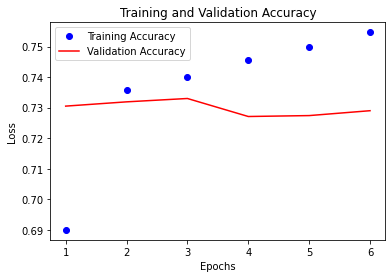

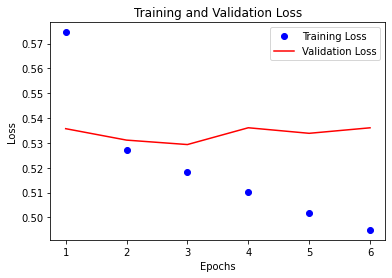

In [31]:
plot_acc_loss(model_history)

#### **1. drop_rate= 0.4**

In [32]:
model = Sequential()
model.add(layers.Embedding(maximum_words, 20))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(15,dropout=0.5))
model.add(layers.Dropout(rate = 0.4))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 20)          20000     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 128)         76288     
_________________________________________________________________
lstm_3 (LSTM)                (None, 15)                8640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 105,473
Trainable params: 105,473
Non-trainable params: 0
________________________________________________

In [33]:
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
model_history = model.fit(X_train, y_train, epochs=6,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/6
1250/1250 [==============================] - 19s 13ms/step - loss: 0.6218 - accuracy: 0.6279 - val_loss: 0.5368 - val_accuracy: 0.7290

Epoch 00001: val_accuracy improved from -inf to 0.72900, saving model to rnn_model.hdf5
Epoch 2/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5277 - accuracy: 0.7357 - val_loss: 0.5339 - val_accuracy: 0.7305

Epoch 00002: val_accuracy improved from 0.72900 to 0.73050, saving model to rnn_model.hdf5
Epoch 3/6
1250/1250 [==============================] - 16s 12ms/step - loss: 0.5167 - accuracy: 0.7445 - val_loss: 0.5322 - val_accuracy: 0.7311

Epoch 00003: val_accuracy improved from 0.73050 to 0.73110, saving model to rnn_model.hdf5
Epoch 4/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5042 - accuracy: 0.7512 - val_loss: 0.5320 - val_accuracy: 0.7309

Epoch 00004: val_accuracy did not improve from 0.73110
Epoch 5/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.4977 - accur

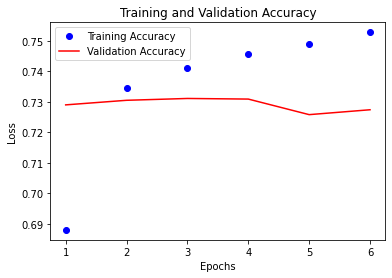

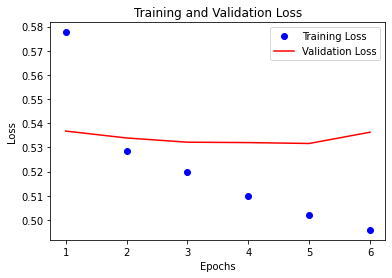

In [34]:
plot_acc_loss(model_history)

### **Conclusion**

I have choosen the dropout rate as 0.2 because it resulted in more stable accuracy and val accuracy.

## 5.4 Experiment 4

### **Loss Function**

#### **1. loss function = binary_crossentropy**

In [ ]:
model = Sequential()
model.add(layers.Embedding(maximum_words, 20))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(15,dropout=0.5))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 20)          20000     
_________________________________________________________________
lstm_25 (LSTM)               (None, None, 128)         76288     
_________________________________________________________________
lstm_26 (LSTM)               (None, 15)                8640      
_________________________________________________________________
dropout_6 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                512       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 33        
Total params: 105,473
Trainable params: 105,473
Non-trainable params: 0
_______________________________________________

In [ ]:
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
model_history = model.fit(X_train, y_train, epochs=6,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/6
1250/1250 [==============================] - 19s 13ms/step - loss: 0.6270 - accuracy: 0.6237 - val_loss: 0.5244 - val_accuracy: 0.7380

Epoch 00001: val_accuracy improved from -inf to 0.73800, saving model to rnn_model.hdf5
Epoch 2/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5233 - accuracy: 0.7409 - val_loss: 0.5194 - val_accuracy: 0.7395

Epoch 00002: val_accuracy improved from 0.73800 to 0.73950, saving model to rnn_model.hdf5
Epoch 3/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5164 - accuracy: 0.7383 - val_loss: 0.5195 - val_accuracy: 0.7370

Epoch 00003: val_accuracy did not improve from 0.73950
Epoch 4/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5074 - accuracy: 0.7453 - val_loss: 0.5208 - val_accuracy: 0.7358

Epoch 00004: val_accuracy did not improve from 0.73950
Epoch 5/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5004 - accuracy: 0.7499 - val_loss: 0.5209 - val

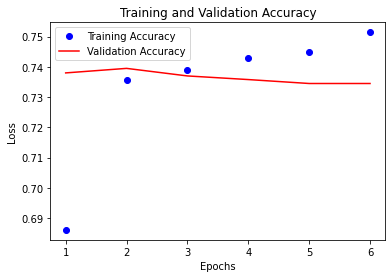

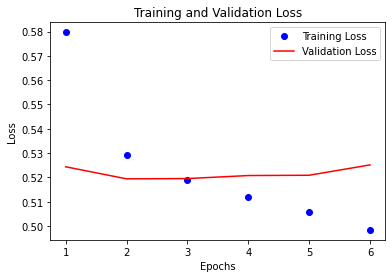

In [ ]:
plot_acc_loss(model_history)

#### **2. loss function = sparse_categorical_crossentropy**

In [ ]:
model = Sequential()
model.add(layers.Embedding(maximum_words, 20))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(15,dropout=0.5))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 20)          20000     
_________________________________________________________________
lstm_21 (LSTM)               (None, None, 128)         76288     
_________________________________________________________________
lstm_22 (LSTM)               (None, 15)                8640      
_________________________________________________________________
dropout_4 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                512       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 33        
Total params: 105,473
Trainable params: 105,473
Non-trainable params: 0
_______________________________________________

In [ ]:
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
model_history = model.fit(X_train, y_train, epochs=6,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/6
1250/1250 [==============================] - 21s 14ms/step - loss: nan - accuracy: 0.4923 - val_loss: nan - val_accuracy: 0.5038

Epoch 00001: val_accuracy improved from -inf to 0.50380, saving model to rnn_model.hdf5
Epoch 2/6
1250/1250 [==============================] - 17s 13ms/step - loss: nan - accuracy: 0.4971 - val_loss: nan - val_accuracy: 0.5038

Epoch 00002: val_accuracy did not improve from 0.50380
Epoch 3/6
1250/1250 [==============================] - 16s 13ms/step - loss: nan - accuracy: 0.4940 - val_loss: nan - val_accuracy: 0.5038

Epoch 00003: val_accuracy did not improve from 0.50380
Epoch 4/6
1250/1250 [==============================] - 17s 13ms/step - loss: nan - accuracy: 0.4943 - val_loss: nan - val_accuracy: 0.5038

Epoch 00004: val_accuracy did not improve from 0.50380
Epoch 5/6
1250/1250 [==============================] - 16s 13ms/step - loss: nan - accuracy: 0.4939 - val_loss: nan - val_accuracy: 0.5038

Epoch 00005: val_accuracy did not improve from 

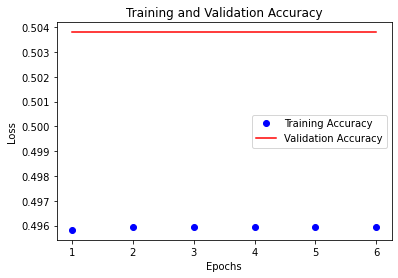

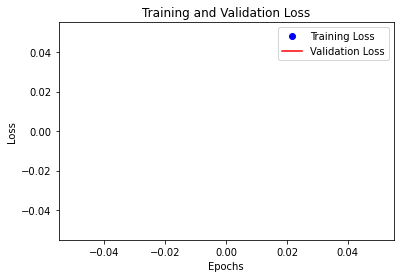

In [ ]:
plot_acc_loss(model_history)

### **Conclusion**

I have choosen binary_crossentropy as the loss function due to its significant perfomance compared to others. 

## 5.5 Experiment 5

### **Optimisation Algorithms**

#### **1. Adam**

In [ ]:
model = Sequential()
model.add(layers.Embedding(maximum_words, 20))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(15,dropout=0.5))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, None, 20)          20000     
_________________________________________________________________
lstm_33 (LSTM)               (None, None, 128)         76288     
_________________________________________________________________
lstm_34 (LSTM)               (None, 15)                8640      
_________________________________________________________________
dropout_10 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 32)                512       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 33        
Total params: 105,473
Trainable params: 105,473
Non-trainable params: 0
_______________________________________________

In [ ]:
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
model_history = model.fit(X_train, y_train, epochs=6,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/6
1250/1250 [==============================] - 19s 13ms/step - loss: 0.6168 - accuracy: 0.6323 - val_loss: 0.5290 - val_accuracy: 0.7338

Epoch 00001: val_accuracy improved from -inf to 0.73380, saving model to rnn_model.hdf5
Epoch 2/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5292 - accuracy: 0.7329 - val_loss: 0.5230 - val_accuracy: 0.7322

Epoch 00002: val_accuracy did not improve from 0.73380
Epoch 3/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5158 - accuracy: 0.7415 - val_loss: 0.5183 - val_accuracy: 0.7396

Epoch 00003: val_accuracy improved from 0.73380 to 0.73960, saving model to rnn_model.hdf5
Epoch 4/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5097 - accuracy: 0.7430 - val_loss: 0.5205 - val_accuracy: 0.7324

Epoch 00004: val_accuracy did not improve from 0.73960
Epoch 5/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.4981 - accuracy: 0.7511 - val_loss: 0.5207 - val

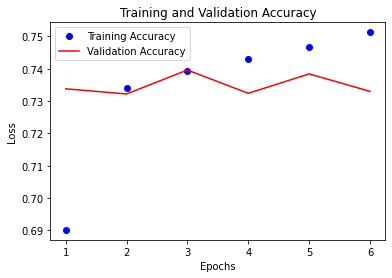

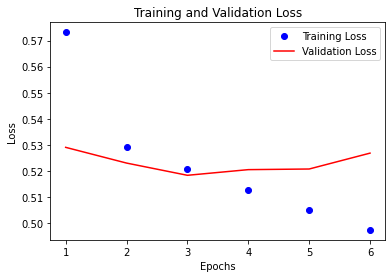

In [ ]:
plot_acc_loss(model_history)

#### **2. RMSprop**

In [ ]:
model = Sequential()
model.add(layers.Embedding(maximum_words, 20))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(15,dropout=0.5))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='RMSprop',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 20)          20000     
_________________________________________________________________
lstm_27 (LSTM)               (None, None, 128)         76288     
_________________________________________________________________
lstm_28 (LSTM)               (None, 15)                8640      
_________________________________________________________________
dropout_7 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)                512       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 105,473
Trainable params: 105,473
Non-trainable params: 0
_______________________________________________

In [ ]:
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
model_history = model.fit(X_train, y_train, epochs=6,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/6
1250/1250 [==============================] - 20s 14ms/step - loss: 0.6476 - accuracy: 0.5960 - val_loss: 0.5303 - val_accuracy: 0.7331

Epoch 00001: val_accuracy improved from -inf to 0.73310, saving model to rnn_model.hdf5
Epoch 2/6
1250/1250 [==============================] - 17s 13ms/step - loss: 0.5304 - accuracy: 0.7340 - val_loss: 0.5226 - val_accuracy: 0.7366

Epoch 00002: val_accuracy improved from 0.73310 to 0.73660, saving model to rnn_model.hdf5
Epoch 3/6
1250/1250 [==============================] - 17s 14ms/step - loss: 0.5203 - accuracy: 0.7395 - val_loss: 0.5221 - val_accuracy: 0.7344

Epoch 00003: val_accuracy did not improve from 0.73660
Epoch 4/6
1250/1250 [==============================] - 17s 13ms/step - loss: 0.5188 - accuracy: 0.7408 - val_loss: 0.5198 - val_accuracy: 0.7387

Epoch 00004: val_accuracy improved from 0.73660 to 0.73870, saving model to rnn_model.hdf5
Epoch 5/6
1250/1250 [==============================] - 17s 14ms/step - loss: 0.5202 - accur

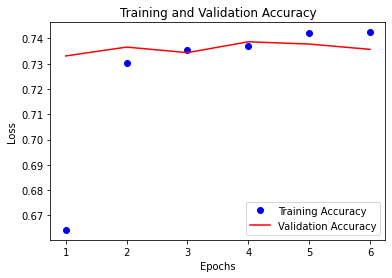

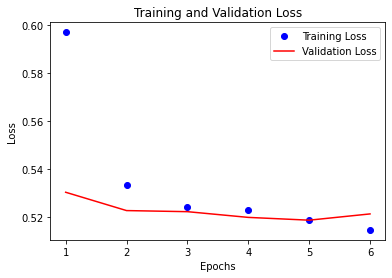

In [ ]:
plot_acc_loss(model_history)

#### **3. SGD**

In [ ]:
model = Sequential()
model.add(layers.Embedding(maximum_words, 20))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(15,dropout=0.5))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='SGD',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, None, 20)          20000     
_________________________________________________________________
lstm_31 (LSTM)               (None, None, 128)         76288     
_________________________________________________________________
lstm_32 (LSTM)               (None, 15)                8640      
_________________________________________________________________
dropout_9 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                512       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 33        
Total params: 105,473
Trainable params: 105,473
Non-trainable params: 0
_______________________________________________

In [ ]:
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
model_history = model.fit(X_train, y_train, epochs=6,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/6
1250/1250 [==============================] - 18s 13ms/step - loss: 0.6931 - accuracy: 0.5068 - val_loss: 0.6931 - val_accuracy: 0.4962

Epoch 00001: val_accuracy improved from -inf to 0.49620, saving model to rnn_model.hdf5
Epoch 2/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.6931 - accuracy: 0.5036 - val_loss: 0.6933 - val_accuracy: 0.4962

Epoch 00002: val_accuracy did not improve from 0.49620
Epoch 3/6
1250/1250 [==============================] - 16s 12ms/step - loss: 0.6929 - accuracy: 0.5075 - val_loss: 0.6924 - val_accuracy: 0.5086

Epoch 00003: val_accuracy improved from 0.49620 to 0.50860, saving model to rnn_model.hdf5
Epoch 4/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.6923 - accuracy: 0.5214 - val_loss: 0.6942 - val_accuracy: 0.4962

Epoch 00004: val_accuracy did not improve from 0.50860
Epoch 5/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.6922 - accuracy: 0.5208 - val_loss: 0.6913 - val

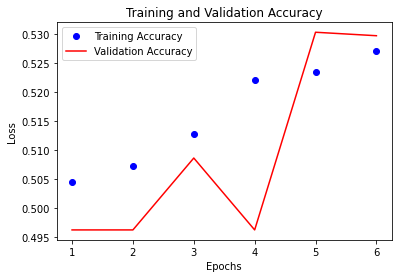

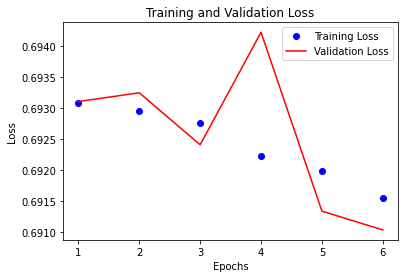

In [ ]:
plot_acc_loss(model_history)

### **Conclusion**

I have choosen RMSprop as the optimization algorithm

## 5.6 Experiment 6

### **Number of Epoch**

#### **1. epoch= 4**

In [ ]:
model = Sequential()
model.add(layers.Embedding(maximum_words, 20))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(15,dropout=0.5))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='RMSprop',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 20)          20000     
_________________________________________________________________
lstm (LSTM)                  (None, None, 128)         76288     
_________________________________________________________________
lstm_1 (LSTM)                (None, 15)                8640      
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 105,473
Trainable params: 105,473
Non-trainable params: 0
__________________________________________________

In [ ]:
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
model_history = model.fit(X_train, y_train, epochs=4,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/4
1250/1250 [==============================] - 123s 96ms/step - loss: 0.6291 - accuracy: 0.6231 - val_loss: 0.5263 - val_accuracy: 0.7323

Epoch 00001: val_accuracy improved from -inf to 0.73230, saving model to rnn_model.hdf5
Epoch 2/4
1250/1250 [==============================] - 120s 96ms/step - loss: 0.5273 - accuracy: 0.7380 - val_loss: 0.5229 - val_accuracy: 0.7304

Epoch 00002: val_accuracy did not improve from 0.73230
Epoch 3/4
1250/1250 [==============================] - 119s 95ms/step - loss: 0.5209 - accuracy: 0.7426 - val_loss: 0.5224 - val_accuracy: 0.7323

Epoch 00003: val_accuracy did not improve from 0.73230
Epoch 4/4
1250/1250 [==============================] - 121s 97ms/step - loss: 0.5178 - accuracy: 0.7451 - val_loss: 0.5222 - val_accuracy: 0.7331

Epoch 00004: val_accuracy improved from 0.73230 to 0.73310, saving model to rnn_model.hdf5


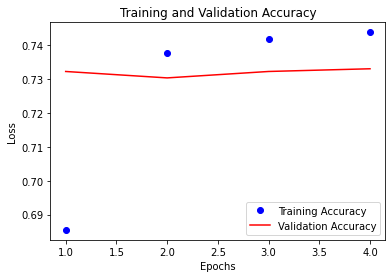

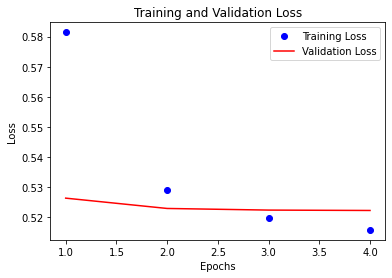

In [ ]:
plot_acc_loss(model_history)

#### **2. epoch= 6**

In [ ]:
model = Sequential()
model.add(layers.Embedding(maximum_words, 20))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(15,dropout=0.5))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='RMSprop',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 20)          20000     
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 128)         76288     
_________________________________________________________________
lstm_5 (LSTM)                (None, 15)                8640      
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 105,473
Trainable params: 105,473
Non-trainable params: 0
________________________________________________

In [ ]:
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
model_history = model.fit(X_train, y_train, epochs=6,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/6
1250/1250 [==============================] - 128s 100ms/step - loss: 0.6249 - accuracy: 0.6325 - val_loss: 0.5285 - val_accuracy: 0.7282

Epoch 00001: val_accuracy improved from -inf to 0.72820, saving model to rnn_model.hdf5
Epoch 2/6
1250/1250 [==============================] - 126s 101ms/step - loss: 0.5290 - accuracy: 0.7377 - val_loss: 0.5239 - val_accuracy: 0.7342

Epoch 00002: val_accuracy improved from 0.72820 to 0.73420, saving model to rnn_model.hdf5
Epoch 3/6
1250/1250 [==============================] - 126s 101ms/step - loss: 0.5187 - accuracy: 0.7444 - val_loss: 0.5262 - val_accuracy: 0.7343

Epoch 00003: val_accuracy improved from 0.73420 to 0.73430, saving model to rnn_model.hdf5
Epoch 4/6
1250/1250 [==============================] - 126s 101ms/step - loss: 0.5118 - accuracy: 0.7436 - val_loss: 0.5189 - val_accuracy: 0.7327

Epoch 00004: val_accuracy did not improve from 0.73430
Epoch 5/6
1250/1250 [==============================] - 126s 101ms/step - loss: 0.51

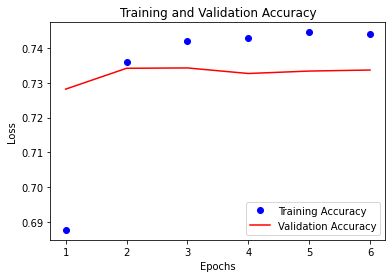

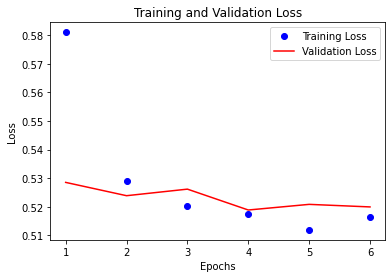

In [ ]:
plot_acc_loss(model_history)

#### **3. epoch= 10**

In [ ]:
model = Sequential()
model.add(layers.Embedding(maximum_words, 20))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(15,dropout=0.5))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='RMSprop',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 20)          20000     
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 128)         76288     
_________________________________________________________________
lstm_7 (LSTM)                (None, 15)                8640      
_________________________________________________________________
dropout_3 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 105,473
Trainable params: 105,473
Non-trainable params: 0
________________________________________________

In [ ]:
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
model_history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/10
1250/1250 [==============================] - 130s 102ms/step - loss: 0.6305 - accuracy: 0.6284 - val_loss: 0.5336 - val_accuracy: 0.7270

Epoch 00001: val_accuracy improved from -inf to 0.72700, saving model to rnn_model.hdf5
Epoch 2/10
1250/1250 [==============================] - 124s 99ms/step - loss: 0.5265 - accuracy: 0.7382 - val_loss: 0.5282 - val_accuracy: 0.7300

Epoch 00002: val_accuracy improved from 0.72700 to 0.73000, saving model to rnn_model.hdf5
Epoch 3/10
1250/1250 [==============================] - 124s 99ms/step - loss: 0.5220 - accuracy: 0.7421 - val_loss: 0.5231 - val_accuracy: 0.7354

Epoch 00003: val_accuracy improved from 0.73000 to 0.73540, saving model to rnn_model.hdf5
Epoch 4/10
1250/1250 [==============================] - 124s 99ms/step - loss: 0.5179 - accuracy: 0.7398 - val_loss: 0.5190 - val_accuracy: 0.7353

Epoch 00004: val_accuracy did not improve from 0.73540
Epoch 5/10
1250/1250 [==============================] - 125s 100ms/step - loss: 0.

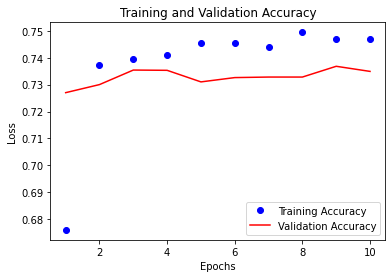

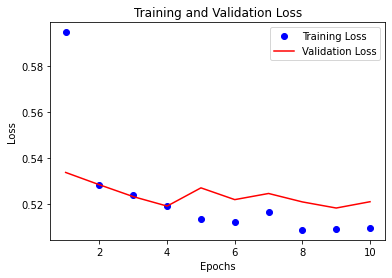

In [ ]:
plot_acc_loss(model_history)

### **Conclusion**

I have choosen epochs as 6 as the learning rate was steady

## 5.6 Experiment 6

### **Gradient Descent**

#### **1. Batch gradient descent**

In [ ]:
model = Sequential()
model.add(layers.Embedding(maximum_words, 20))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(15,dropout=0.5))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='RMSprop',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 20)          20000     
_________________________________________________________________
lstm_14 (LSTM)               (None, None, 128)         76288     
_________________________________________________________________
lstm_15 (LSTM)               (None, 15)                8640      
_________________________________________________________________
dropout_7 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                512       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 105,473
Trainable params: 105,473
Non-trainable params: 0
________________________________________________

In [ ]:
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
model_history = model.fit(X_train, y_train, epochs=6,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/6
1250/1250 [==============================] - 130s 101ms/step - loss: 0.6255 - accuracy: 0.6306 - val_loss: 0.5334 - val_accuracy: 0.7285

Epoch 00001: val_accuracy improved from -inf to 0.72850, saving model to rnn_model.hdf5
Epoch 2/6
1250/1250 [==============================] - 125s 100ms/step - loss: 0.5262 - accuracy: 0.7362 - val_loss: 0.5999 - val_accuracy: 0.6637

Epoch 00002: val_accuracy did not improve from 0.72850
Epoch 3/6
1250/1250 [==============================] - 126s 101ms/step - loss: 0.5184 - accuracy: 0.7405 - val_loss: 0.5206 - val_accuracy: 0.7337

Epoch 00003: val_accuracy improved from 0.72850 to 0.73370, saving model to rnn_model.hdf5
Epoch 4/6
1250/1250 [==============================] - 127s 102ms/step - loss: 0.5152 - accuracy: 0.7422 - val_loss: 0.5205 - val_accuracy: 0.7332

Epoch 00004: val_accuracy did not improve from 0.73370
Epoch 5/6
1250/1250 [==============================] - 127s 102ms/step - loss: 0.5109 - accuracy: 0.7462 - val_loss: 0.

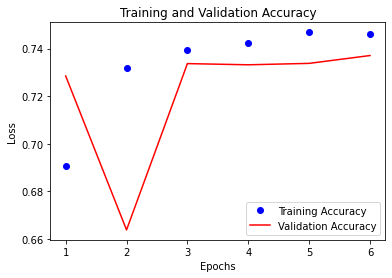

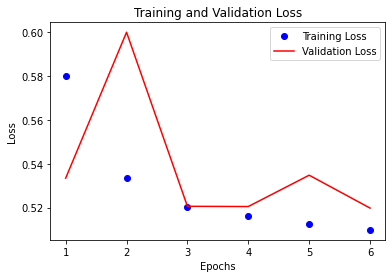

In [ ]:
plot_acc_loss(model_history)

#### **2. Mini-batch gradient descent**

In [ ]:
model = Sequential()
model.add(layers.Embedding(maximum_words, 20))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(15,dropout=0.5))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='RMSprop',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 20)          20000     
_________________________________________________________________
lstm_12 (LSTM)               (None, None, 128)         76288     
_________________________________________________________________
lstm_13 (LSTM)               (None, 15)                8640      
_________________________________________________________________
dropout_6 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                512       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 105,473
Trainable params: 105,473
Non-trainable params: 0
________________________________________________

In [ ]:
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
model_history = model.fit(X_train, y_train, epochs=6,batch_size=64,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/6
625/625 [==============================] - 102s 160ms/step - loss: 0.6324 - accuracy: 0.6228 - val_loss: 0.5277 - val_accuracy: 0.7306

Epoch 00001: val_accuracy improved from -inf to 0.73060, saving model to rnn_model.hdf5
Epoch 2/6
625/625 [==============================] - 99s 158ms/step - loss: 0.5273 - accuracy: 0.7376 - val_loss: 0.5221 - val_accuracy: 0.7303

Epoch 00002: val_accuracy did not improve from 0.73060
Epoch 3/6
625/625 [==============================] - 98s 157ms/step - loss: 0.5180 - accuracy: 0.7435 - val_loss: 0.5205 - val_accuracy: 0.7322

Epoch 00003: val_accuracy improved from 0.73060 to 0.73220, saving model to rnn_model.hdf5
Epoch 4/6
625/625 [==============================] - 99s 158ms/step - loss: 0.5078 - accuracy: 0.7480 - val_loss: 0.5197 - val_accuracy: 0.7337

Epoch 00004: val_accuracy improved from 0.73220 to 0.73370, saving model to rnn_model.hdf5
Epoch 5/6
625/625 [==============================] - 99s 158ms/step - loss: 0.5124 - accuracy:

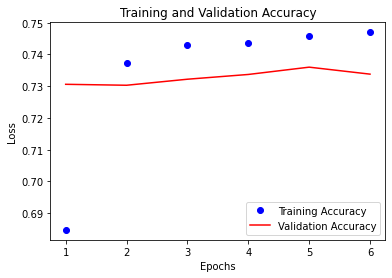

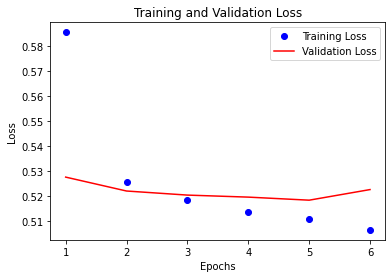

In [ ]:
plot_acc_loss(model_history)

### **Conclusion**

I have choosen Mini-batch gradient descent as the gradient descent due to linear learning curve.

# **6. Final Model**

In [35]:
model = Sequential()
model.add(layers.Embedding(maximum_words, 20))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(15,dropout=0.5))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='RMSprop',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 20)          20000     
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 128)         76288     
_________________________________________________________________
lstm_5 (LSTM)                (None, 15)                8640      
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 105,473
Trainable params: 105,473
Non-trainable params: 0
________________________________________________

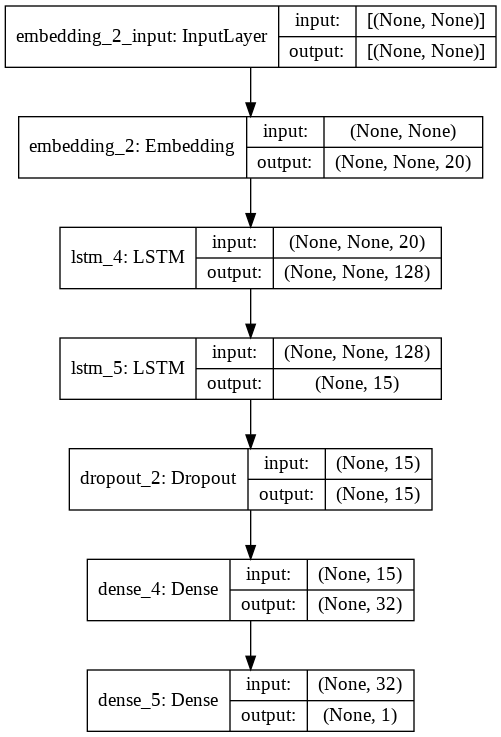

In [36]:
keras.utils.plot_model(model, show_shapes=True)

In [37]:
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
model_history = model.fit(X_train, y_train, epochs=6,batch_size=64,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/6
625/625 [==============================] - 12s 15ms/step - loss: 0.6321 - accuracy: 0.6228 - val_loss: 0.5416 - val_accuracy: 0.7278

Epoch 00001: val_accuracy improved from -inf to 0.72780, saving model to rnn_model.hdf5
Epoch 2/6
625/625 [==============================] - 9s 14ms/step - loss: 0.5233 - accuracy: 0.7385 - val_loss: 0.5300 - val_accuracy: 0.7335

Epoch 00002: val_accuracy improved from 0.72780 to 0.73350, saving model to rnn_model.hdf5
Epoch 3/6
625/625 [==============================] - 9s 14ms/step - loss: 0.5151 - accuracy: 0.7471 - val_loss: 0.5292 - val_accuracy: 0.7308

Epoch 00003: val_accuracy did not improve from 0.73350
Epoch 4/6
625/625 [==============================] - 9s 14ms/step - loss: 0.5116 - accuracy: 0.7456 - val_loss: 0.5279 - val_accuracy: 0.7315

Epoch 00004: val_accuracy did not improve from 0.73350
Epoch 5/6
625/625 [==============================] - 8s 14ms/step - loss: 0.5063 - accuracy: 0.7471 - val_loss: 0.5271 - val_accuracy: 0.7

In [38]:
#Defnining a handy function in order to plot various models accuracy and loss progress

def plot_acc_loss(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


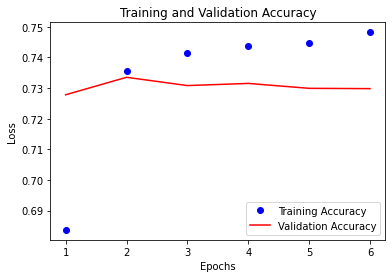

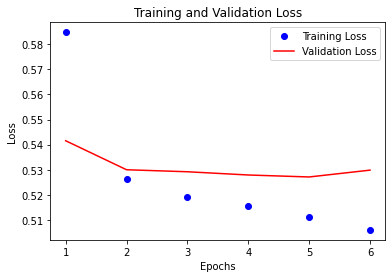

In [39]:
plot_acc_loss(model_history)